# Introduction

### Business Understanding

This Jupyter notebook contains an analysis of Airbnb listings in Boston, focusing on price trends. The goal of this analysis is to identify any patterns or insights that can inform pricing strategies for Airbnb hosts in Boston, as well as provide valuable information for prospective guests looking to book a stay in the city.

I'll take a look at both boston and seattle listings, but focus my analysis on AirBnB listings in Boston. However, the script could also be run on the Seattle dataset to receive similar insights. Specifically, this analysis will focus on analyzing price trends in the Boston AirBnB dataset.

To guide this analysis, we will follow the CRISP-DM (Cross-Industry Standard Process for Data Mining) process, a widely-used methodology for data mining and analytics projects. This process consists of six main phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment.

Our analysis will focus on three key areas:

Seasonal price trends: We will examine how the average listing price changes over the year by grouping the listings by month and calculating the mean or median price for each month. This will allow us to identify any seasonal trends in pricing.

Neighborhood price comparison: We will compare the average listing prices across different neighborhoods in Boston by grouping the listings by neighborhood and calculating the mean or median price for each neighborhood. This will help us identify any significant price differences between different parts of the city.

Impact of property type on price: We will investigate how the type of property (e.g. apartment, house, private room) affects the listing price by grouping the listings by property type and calculating the mean or median price for each type. Additionally, we will explore how other factors such as the number of bedrooms, bathrooms, and amenities impact the listing price for each property type.

By following the CRISP-DM process and analyzing these three key areas, we hope to gain valuable insights into price trends in the Boston Airbnb market and provide actionable recommendations for Airbnb hosts and guests alike.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

Gather data

In [2]:
boston_listings = pd.read_csv('boston_listings.csv')
seattle_listings = pd.read_csv('seattle_listings.csv')
boston_calendar = pd.read_csv('boston_calendar.csv')
boston_reviews = pd.read_csv('boston_reviews.csv')

## Visually and programatically assess datasets

Data Understanding

In [3]:
# Dataset shape
boston_listings.shape

(3585, 95)

In [4]:
seattle_listings.shape

(3818, 92)

In [5]:
boston_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
seattle_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [7]:
boston_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [8]:
seattle_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
# Null values
boston_null = boston_listings.isnull().sum()
boston_null

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 95, dtype: int64

# Data Preparation

Data cleaning

In [10]:
# Drop columns that are unnecessary for this analysis
boston_listings.drop(['space', 'neighborhood_overview', 'transit', 'access', 'interaction', 'house_rules', 'picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_about', 'host_neighbourhood', 'host_picture_url', 'street', 'state', 'smart_location', 'country_code', 'country', 'first_review', 'host_id', 'calendar_last_scraped', 'market'], axis = 1, inplace=True)

In [11]:
# Test if columns were dropped
boston_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'description', 'experiences_offered', 'notes', 'thumbnail_url',
       'medium_url', 'xl_picture_url', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'zipcode', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       

In [12]:
# Drop columns with more than 50% missing values
null_ratio = boston_null / len(boston_listings) * 100
drop_columns = null_ratio[null_ratio > 50].index
boston_listings.drop(drop_columns, axis = 1, inplace = True)

In [13]:
boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   description                       3585 non-null   object 
 7   experiences_offered               3585 non-null   object 
 8   thumbnail_url                     2986 non-null   object 
 9   medium_url                        2986 non-null   object 
 10  xl_picture_url                    2986 non-null   object 
 11  host_since                        3585 non-null   object 
 12  host_l

In [14]:
boston_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [15]:
boston_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


## Summary - Boston dataset

- The reviews dataset seems very clean with 68275 entries and no missing values
- Listings: We have 3585 listings in Boston with 95 total columns. Many columns have missing values
- Calendar: We have 1308890 entries, but only 643037 non-null price objects

In [16]:
boston_listings.price

0       $250.00
1        $65.00
2        $65.00
3        $75.00
4        $79.00
         ...   
3580     $69.00
3581    $150.00
3582    $198.00
3583     $65.00
3584     $65.00
Name: price, Length: 3585, dtype: object

In [17]:
# Fix price column
if type (boston_listings.price[0]) == str:
    boston_listings.price = boston_listings.price.apply(lambda x: float(x[1:].replace(',', '')))

In [18]:
categorical_cols = boston_listings.select_dtypes(include=['object'])
num_categorical_cols = len(categorical_cols)
print(num_categorical_cols)
print(categorical_cols.columns)

3585
Index(['listing_url', 'last_scraped', 'name', 'summary', 'description',
       'experiences_offered', 'thumbnail_url', 'medium_url', 'xl_picture_url',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'zipcode',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'last_review', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')


In [19]:
boston_listings['requires_license'].value_counts()

f    3585
Name: requires_license, dtype: int64

## Exploratory Data analysis

In [21]:
boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [39]:
value_counts = boston_calendar['price'].value_counts(dropna=False)
nan_count = boston_calendar['price'].isna().sum()

print("Value counts for the price column:")
print(value_counts)
print("\nNumer of NaNs in the 'price' column:", nan_count)

Value counts for the price column:
150.0     20752
65.0      17518
75.0      16249
100.0     15499
200.0     14326
          ...  
1875.0        1
1621.0        1
1695.0        1
1924.0        1
1017.0        1
Name: price, Length: 1246, dtype: int64

Numer of NaNs in the 'price' column: 0


There are actually 665853 missing price points in the boston calendar dataframe. This is a lot. We have several options to deal with NaN values: 1. Fill missing values with specific value like 0 or mean price, 2. Interpolate missing values based on surrounding data, 3. Drop rows with missing values. 

# Data Analysis and Visualisations

# Seasonal Price Trends

To analyze the seasonal price trends of Airbnb listings in Boston:

1. Convert the price column to a numeric data type. The price column is currently stored as a string with a dollar sign at the beginning, so I will remove the dollar sign and convert the string to a float.

2. Convert date column 

3. Group by month, calculate the mean price and visualise

In [23]:
boston_calendar.dropna(subset=['price'], inplace=True)

In [24]:

# Remove any non-numeric characters
boston_calendar['price'] = boston_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert the 'date' column to a datetime object
boston_calendar['date'] = pd.to_datetime(boston_calendar['date'])

# group by month and calculate the mean price
dates = boston_calendar.groupby(boston_calendar['date'].dt.strftime('%B'), sort=False)['price'].mean()

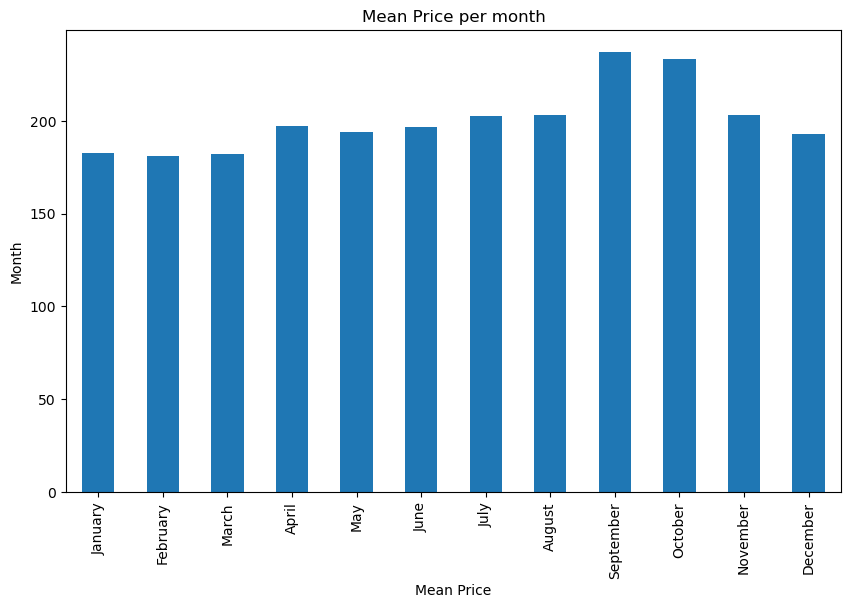

In [26]:
dates.plot(kind='bar', figsize=(10, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dates = dates.reindex(month_order)
plt.title('Mean Price per month')
plt.xlabel('Mean Price')
plt.ylabel('Month')
plt.show()

An examination of price trends across the year suggests that prices in Boston remain relatively stable throughout most of the year. However, there is a slight increase or spike in prices during the months of September and October. This could be attributed to the popularity of Boston as a travel destination during the late summer and early fall months.

Analyse Ratings

In [29]:
''' 
transforms any NaN values in the "review_scores_value" column of the DataFrame df to 0, and then counts the frequency of each unique value in that column
''' 
fill = lambda x : 0 if str(x) == "nan" else int(x)
ratings = boston_listings['review_scores_value'].apply(fill).value_counts().sort_index(ascending=False)
print(ratings)

10    1177
9     1130
8      334
7       51
6       49
5        2
4       12
3        2
2        7
0      821
Name: review_scores_value, dtype: int64


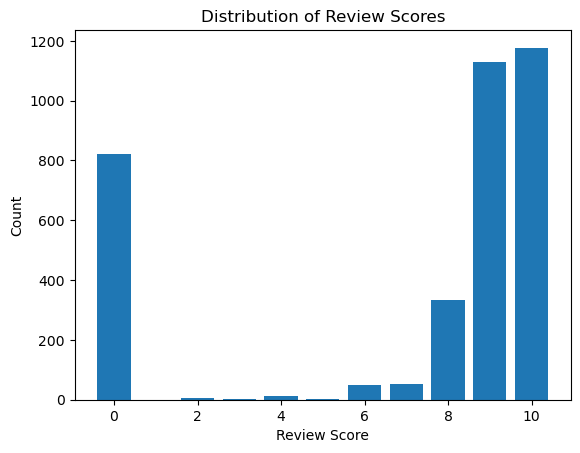

In [30]:
plt.bar(ratings.index, ratings.values)
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.title('Distribution of Review Scores')
plt.show()

It appears that the majority of customers are highly satisfied with their experience, as the vast majority of reviews fall within the 9-10 score range. Specifically, 9-10 scores are the most commonly given review scores, indicating that customers are generally very happy with their stay.

In [32]:
boston_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'description', 'experiences_offered', 'thumbnail_url', 'medium_url',
       'xl_picture_url', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'zipcode',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'rev

# Neighbourhood Price Comparison

To compare the average listing prices across different neighborhoods in Boston:

1. Group the listings by neighborhood and calculate the mean or median price for each neighborhood.

2. Sort the neighborhoods by median price to identify any significant price differences between different parts of the city.

Let's first look at the number of listings per neighbourhood

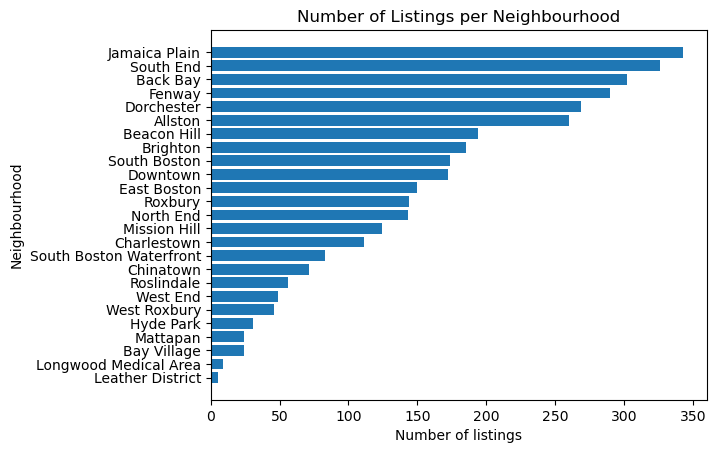

In [34]:
# get value counts of the column
neighbourhood_counts = boston_listings['neighbourhood_cleansed'].value_counts()

# create a horizontal bar chart
plt.barh(neighbourhood_counts.index, neighbourhood_counts.values)
plt.gca().invert_yaxis()
plt.xlabel('Number of listings')
plt.ylabel('Neighbourhood')
plt.title('Number of Listings per Neighbourhood')
plt.show()


### Insight

Jamaica Plain, South End, Back Bay, and Fenway have the highest number of listings in Boston. The leather District and Longwood Medical Area have the lowest.

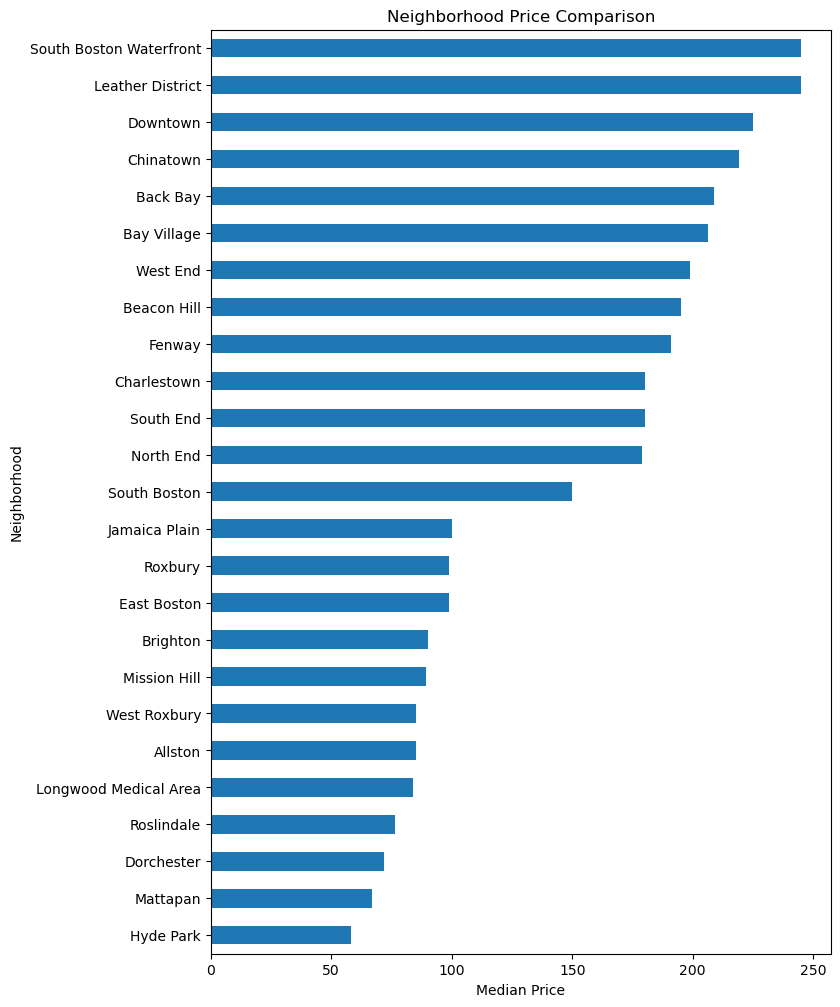

In [37]:
# Group the listings by neighborhood and calculate the median price for each neighborhood
price_by_neighborhood = boston_listings.groupby('neighbourhood_cleansed')['price'].median()

# Sort the neighborhoods by median price
price_by_neighborhood = price_by_neighborhood.sort_values()

# Visualize the neighborhood price comparison using a horizontal bar chart
price_by_neighborhood.plot(kind='barh', figsize=(8,12))
plt.title('Neighborhood Price Comparison')
plt.xlabel('Median Price')
plt.ylabel('Neighborhood')
plt.show()

### Insight

The top 4 neighborhoods with the highest median prices are South Boston Waterfront, Leather District, Downtown, and Chinatown. These neighborhoods are located in or near the heart of Boston and offer convenient access to many of the city's popular attractions.

On the other hand, the neighborhood with the lowest median price is Hyde Park, with a median price of 55. This neighborhood is located further away from the city center and may not offer the same level of convenience or proximity to popular attractions.

It's worth noting that these median prices are for all types of listings within each neighborhood, including entire homes, private rooms, and shared rooms. Additionally, there may be significant variation in pricing within each neighborhood depending on factors such as the type of listing, the number of bedrooms and bathrooms.

This analysis suggests that neighborhood is an important factor to consider when searching for an Airbnb listing in Boston, as prices can vary significantly depending on the location.

# Impact of Property Type on Price

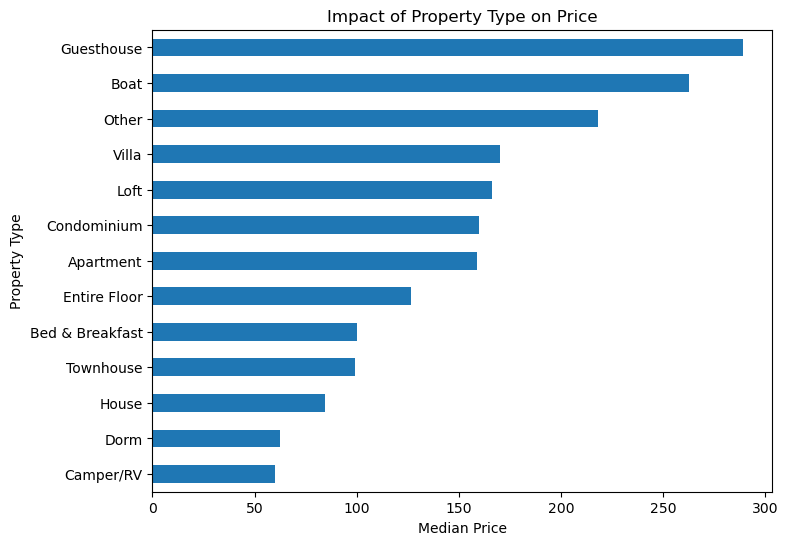

In [38]:
# Group the listings by property type and calculate the median price for each type
price_by_property_type = boston_listings.groupby('property_type')['price'].median()

# Sort the property types by median price
price_by_property_type = price_by_property_type.sort_values()

# Visualize the impact of property type on price using a horizontal bar chart
price_by_property_type.plot(kind='barh', figsize=(8,6))
plt.title('Impact of Property Type on Price')
plt.xlabel('Median Price')
plt.ylabel('Property Type')
plt.show()

### Insight

We can see that there are significant differences in median listing prices across different types of properties in the Boston Airbnb dataset. The property type with the highest median price is Guesthouse, with a median price of 280. The second highest median price is for Boat listings, with a median price of 260. This is likely due to the unique experience that a boat stay offers, as well as the potential for a waterfront location. Interestingly, the property type with the third highest median price is "Other", with a median price of 220. This category may include unique and unconventional properties that do not fit into other categories, such as treehouses, yurts, or tiny homes. On the other end of the spectrum, the property type with the lowest median price is Camper/RV, with a median price of 60. This suggests that these types of listings may be more budget-friendly and appeal to travelers who are seeking a more adventurous and rustic experience.

Our analysis suggests that property type is an important factor to consider when searching for an Airbnb listing in Boston, as prices can vary significantly depending on the type of property. However, it's worth noting that other factors such as location, amenities, and size may also have a significant impact on pricing within each property type.

# Evaluation

The initial goals and objectives of the project were achieved. The analysis successfully answered the questions set out at the beginning of the project, namely: how do listing prices change over the year, are there significant differences in pricing between different neighborhoods in Boston, and how does the type of property affect the listing price?

The analysis provided insights into seasonal price trends, neighborhood price comparisons, and the impact of property type on pricing. The findings are useful for both travelers and hosts, as they provide information on when to visit Boston, which neighborhoods are more expensive or affordable, and which types of properties tend to be more expensive.

# Deployment
The deployment of this analysis involves sharing the results and insights with the relevant stakeholders. In this case, the findings can be shared with Airbnb hosts and travelers who are interested in the Boston market. For this, I wrote a detailed blog post "Boston Airbnb Insights: Unlocking Seasonal Trends, Neighbourhood Price Comparisons, and Impactful Property Types" which communicates our insights and findings in an accessible format to our target group. 

Link: https://medium.com/@mail_94323/boston-airbnb-insights-unlocking-seasonal-trends-neighbourhood-price-comparisons-and-impactful-11de2ce7e879